<a href="https://colab.research.google.com/github/isaacvicto/automatic-irrigation-system/blob/master/DeepDrid_D18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
import sklearn
import matplotlib.pyplot as plt
#from vit_keras import vit, utils, visualize

## code to create numpy arrays of training, testing datasets (need to be executed only once)

This helps in changing the directory for cloning github datasets

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


Following line is used to clone the dataset to above mentioned directory

In [4]:
! git clone https://github.com/sutummala/Fundus-Quality-Estimation.git

fatal: destination path 'Fundus-Quality-Estimation' already exists and is not an empty directory.


The following function is used to extract the fundus images along with labels for train, test and validation datasets as per the paper

In [5]:
def extract_data_and_lables(data_dir, data_):
  data = []
  image_labels =[]
  for folder in sorted(os.listdir(data_dir)):
    images = os.listdir(os.path.join(data_dir, folder))
    for info in range(np.shape(data_)[0]):
      if data_[info, 0] == int(folder):
        print(f'Doing for Subject ID: {int(folder)}, and Image:{data_[info, 1]}')
        if data_training[info, 1][-2]=='l':
          print(f'Subject ID: {int(folder)}, Image:{data_[info, 1]}, Image_label:{data_[info, 2]}')
          image_label = data_[info, 2]
        elif data_[info, 1][-2] == 'r':
          print(f'Subject ID: {int(folder)}, Image:{data_[info, 1]}, Image_label:{data_[info, 2]}')
          image_label = data_[info, 2]

        for image in images:
          if image[:-4]==data_[info, 1]:
            print(f'Match found {image[:-4]}, {data_[info, 1]}')
            image_data = cv2.imread(os.path.join(data_dir, folder, image))
            data.append(cv2.resize(image_data, (224, 224)))
            image_labels.append(image_label)
  return np.array(data), np.array(image_labels)

The following lines of code is used to load the directory of images

In [6]:
data_dir_training = '/content/drive/MyDrive/regular_fundus_images/regular-fundus-training/Images'
data_dir_validation = '/content/drive/MyDrive/regular_fundus_images/regular-fundus-validation/Images'
data_dir_test = '/content/drive/MyDrive/regular_fundus_images/Online-Challenge1&2-Evaluation/Images'

Now load the excel files with all the details about the fundus images that includes quality indicators,

In [7]:
data_training_file = pd.read_csv('/content/drive/MyDrive/regular_fundus_images/regular-fundus-training/regular-fundus-training.csv')
data_validation_file = pd.read_csv('/content/drive/MyDrive/regular_fundus_images/regular-fundus-validation/regular-fundus-validation.csv')
data_test_file = pd.read_excel('/content/drive/MyDrive/regular_fundus_images/Online-Challenge1&2-Evaluation/challenges_patient_id_newfile.xlsx')

Create the numpy arrays with patient details and overall quality as labels

In [8]:
data_training=data_training_file[['patient_id', 'image_id', 'Overall quality']].to_numpy()
data_validation=data_validation_file[['patient_id', 'image_id', 'Overall quality']].to_numpy()
data_test=data_test_file[['patient_id', 'image_id', 'Overall quality']].to_numpy()

Now based on the patient details, create the x_train with images and y_train with labels from the above data and do the same for other X and Y variables

In [9]:
X_train, y_train = extract_data_and_lables(data_dir_training, data_training)
X_validation, y_validation = extract_data_and_lables(data_dir=data_dir_validation, data_=data_validation)
X_test, y_test = extract_data_and_lables(data_dir_test, data_test)
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

Streaming output truncated to the last 5000 lines.
Subject ID: 174, Image:174_l1, Image_label:0
Match found 174_l1, 174_l1
Doing for Subject ID: 174, and Image:174_l2
Subject ID: 174, Image:174_l2, Image_label:0
Match found 174_l2, 174_l2
Doing for Subject ID: 174, and Image:174_r1
Subject ID: 174, Image:174_r1, Image_label:0
Match found 174_r1, 174_r1
Doing for Subject ID: 174, and Image:174_r2
Subject ID: 174, Image:174_r2, Image_label:0
Match found 174_r2, 174_r2
Doing for Subject ID: 175, and Image:175_l1
Subject ID: 175, Image:175_l1, Image_label:0
Match found 175_l1, 175_l1
Doing for Subject ID: 175, and Image:175_l2
Subject ID: 175, Image:175_l2, Image_label:0
Match found 175_l2, 175_l2
Doing for Subject ID: 175, and Image:175_r1
Subject ID: 175, Image:175_r1, Image_label:0
Match found 175_r1, 175_r1
Doing for Subject ID: 175, and Image:175_r2
Subject ID: 175, Image:175_r2, Image_label:0
Match found 175_r2, 175_r2
Doing for Subject ID: 176, and Image:176_l1
Subject ID: 176, Imag

Once the X and y variables are created use the below lines of code to save them in numpy array form

In [10]:
# Saving the data
np.save('/content/drive/MyDrive/isaac/M7_x_train/x_train.npy', X_train)
np.save('/content/drive/MyDrive/isaac/M7_y_train/y_train.npy', y_train)
np.save('/content/drive/MyDrive/isaac/M7_validation/x_validation.npy', X_validation)
np.save('/content/drive/MyDrive/isaac/M7_y_validation/y_validation.npy', y_validation)
np.save('/content/drive/MyDrive/isaac/M7_x__test/x_test.npy', X_test)
np.save('/content/drive/MyDrive/isaac/M7_y_test/y_test.npy', y_test)

## load the datasets

In [42]:
# Loading the data
X_train = np.load('/content/drive/MyDrive/isaac/M7_x_train/x_train.npy')
y_train = np.load('/content/drive/MyDrive/isaac/M7_y_train/y_train.npy')
X_validation = np.load('/content/drive/MyDrive/isaac/M7_validation/x_validation.npy')
y_validation = np.load('/content/drive/MyDrive/isaac/M7_y_validation/y_validation.npy')
X_test = np.load('/content/drive/MyDrive/isaac/M7_x__test/x_test.npy')
y_test = np.load('/content/drive/MyDrive/isaac/M7_y_test/y_test.npy')

The following line code is used to display the fundus images along with respective labels for your reference

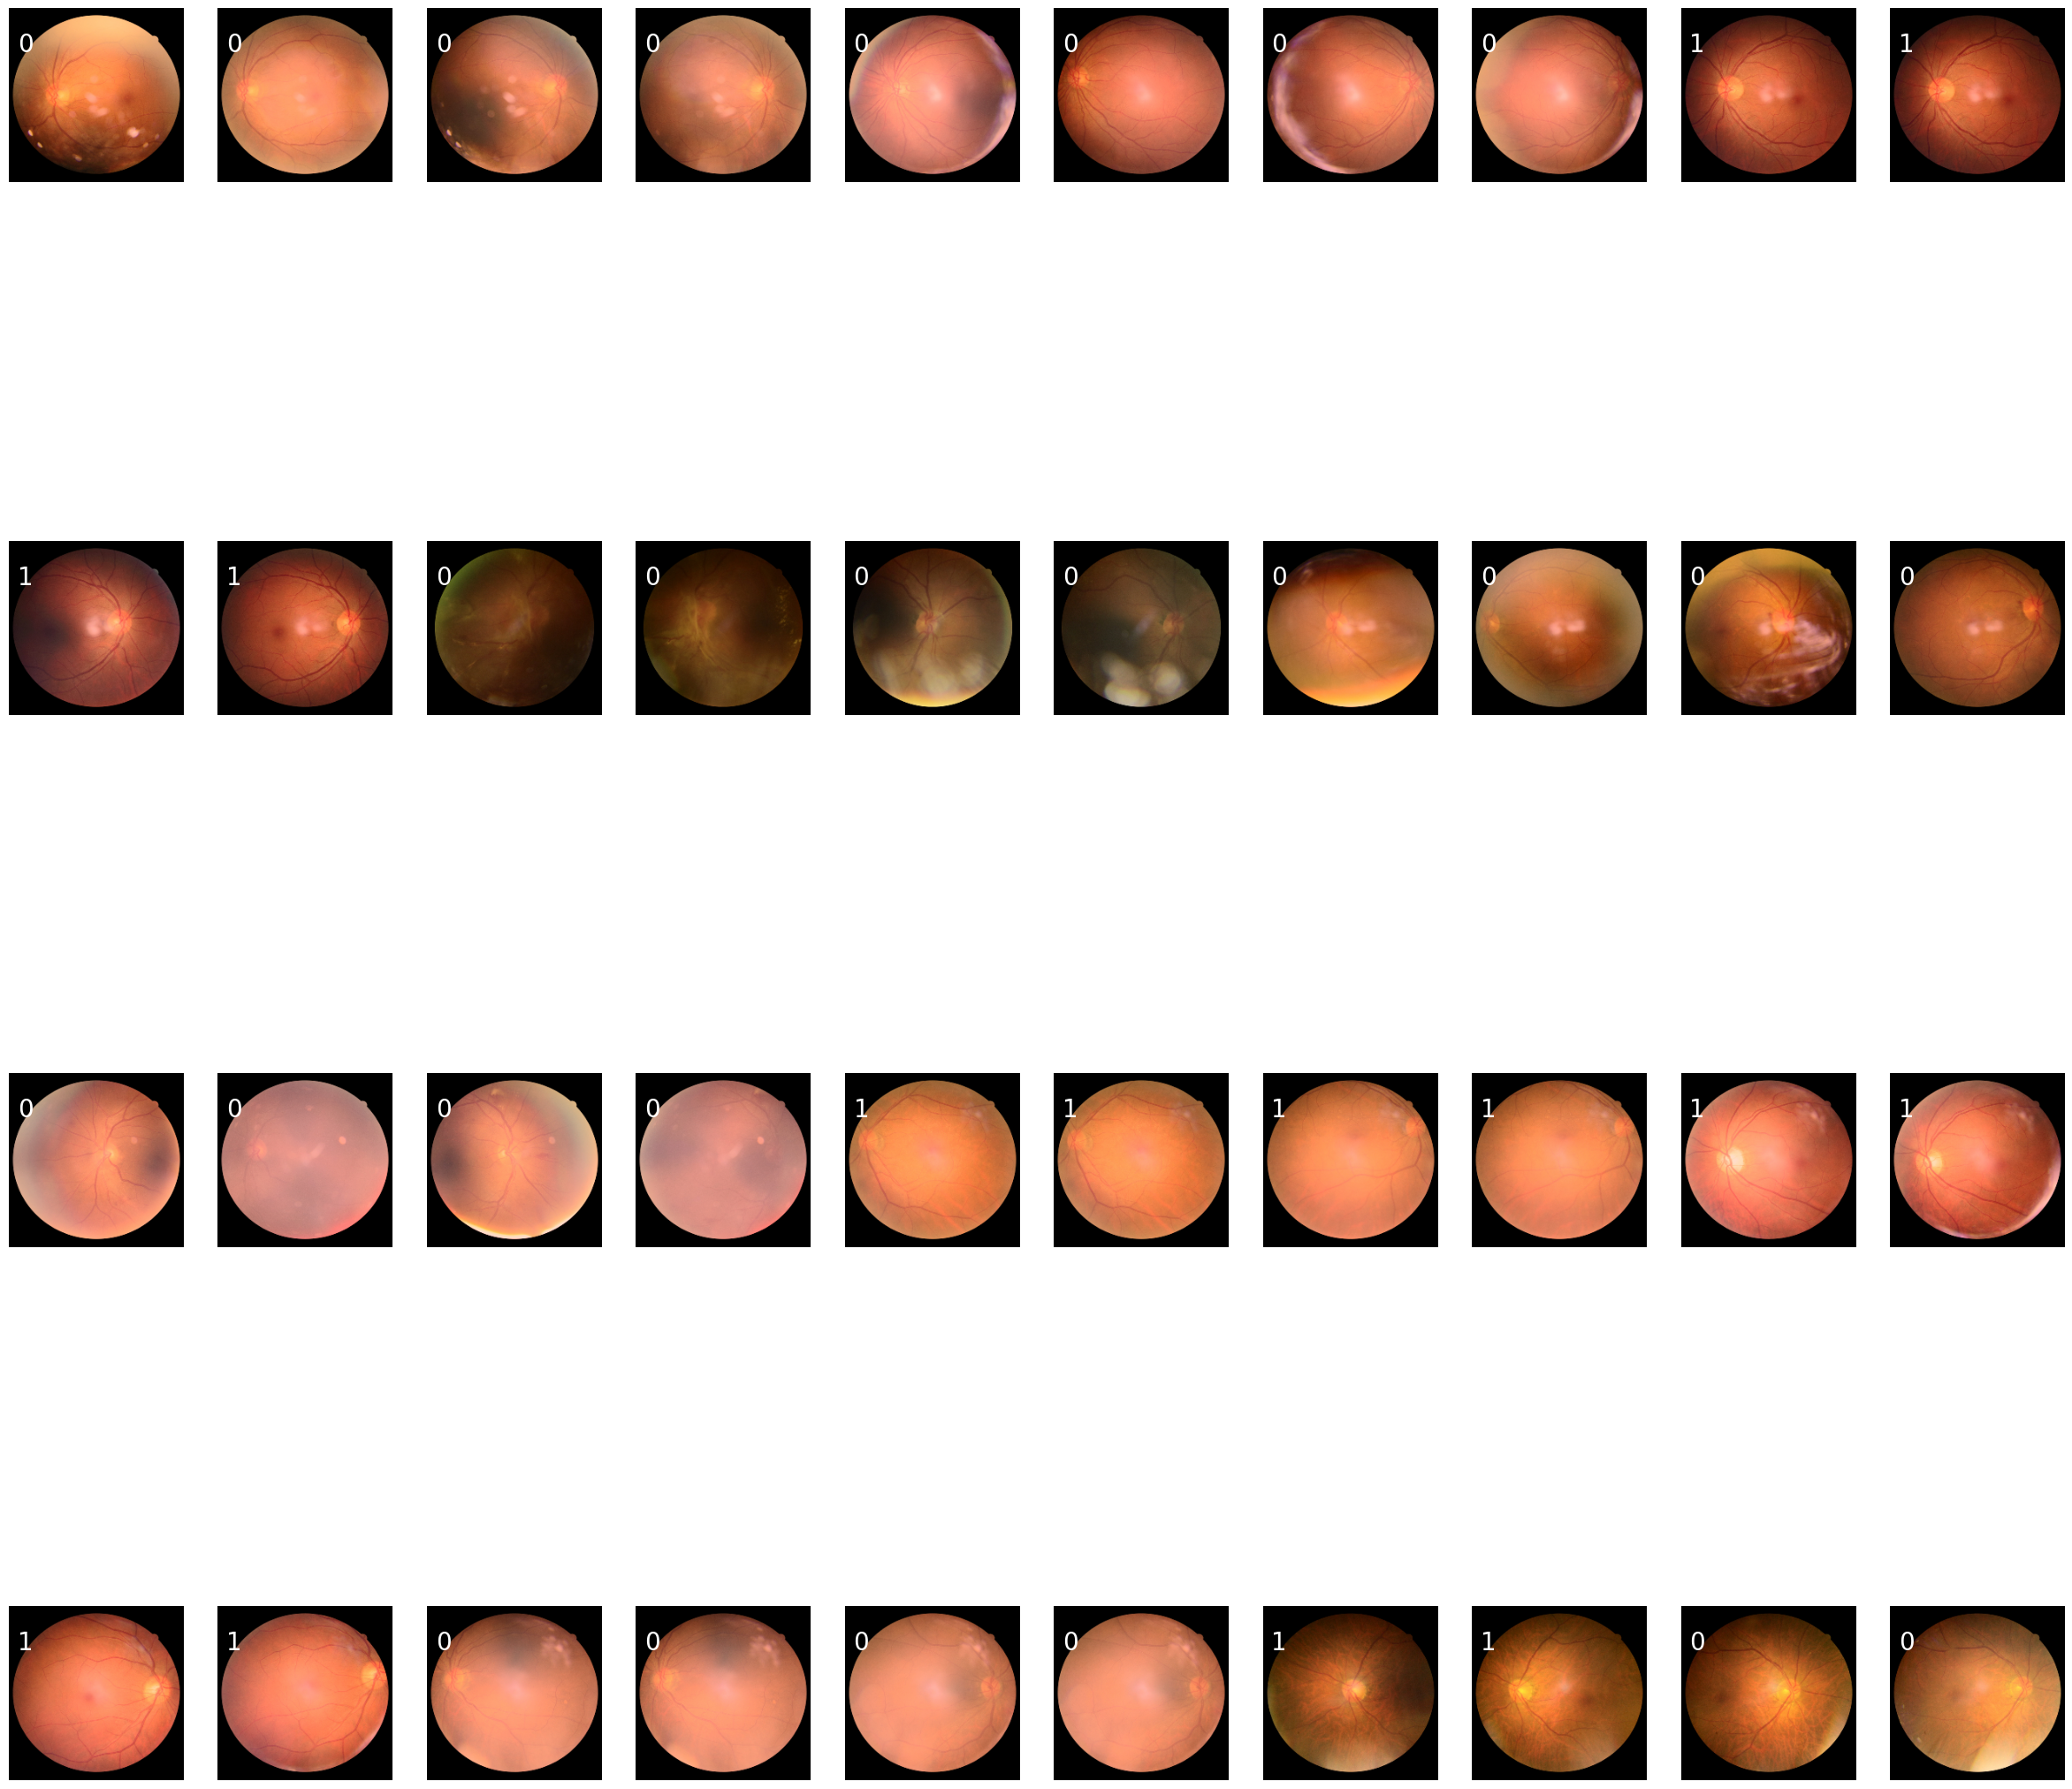

In [43]:
from IPython.core.pylabtools import figsize
fig, axs = plt.subplots(4,10,figsize = (30,30))
# Flatten the axes array for easier iteration
axs = axs.flatten()
for i in range(40):
    xx = X_train[i,:,:,:] #20,12,22
    xx = cv2.cvtColor(xx, cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(xx)
    axs[i].text(0.05, 0.75, str(y_train[i]), fontsize=20, color='white', transform=axs[i].transAxes)

Once numpy arrays are loaded, create the efficientnet model of your choice and start complie and fitting it with training dataset

Here, the images are resized as per the model requirement and preprocessing is included to make them suitable for the model

Also, sigmoid function is used as it is binary classification

In [44]:
IMAGE_SIZE = [224, 224, 3]
#NUM_CLASSES = len(np.unique(y_train))

#base_model = SwinTransformer('swin_base_224', include_top=False, pretrained=True)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L(include_top = False, input_shape = IMAGE_SIZE, include_preprocessing = True)
#input = tf.keras.Input(IMAGE_SIZE)
model = tf.keras.Sequential([tf.keras.layers.Input(shape=(IMAGE_SIZE))])
model.add(base_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


The following line of code is used for summarizing the model created

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-l (Functional)        │ (None, 7, 7, 1280)          │     117,746,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,748,129 (449.17 MB)

 Trainable params: 117,235,553 (447.22 MB)

 Non-trainable params: 512,576 (1.96 MB)

Now the following line of code is used to keep lass 20% parameters trainable and 80% paramets non trainable and then summarize

In [46]:
# Total number of layers in the base model
total_layers = len(base_model.layers)

# Calculate the index to start making layers trainable
start_trainable = int(0.95 * total_layers)  # 80% index

# Loop through the layers and set trainability
for i, layer in enumerate(base_model.layers):
    if i >= start_trainable:
        layer.trainable = True  # Last 20% layers are trainable
    else:
        layer.trainable = False  # First 80% layers are non-trainable


In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-l (Functional)        │ (None, 7, 7, 1280)          │     117,746,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,748,129 (449.17 MB)

 Trainable params: 21,879,521 (83.46 MB)

 Non-trainable params: 95,868,608 (365.71 MB)

Now, you adjust the number of trainable parameters compile the model as per the optimizer and other parameters mentioned in base paper

In [48]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

Now find the model after compiling with the details mentioned in base paper. Here, the validation_split is one for checking the performance of trained model.

In [49]:
model.fit(X_train, y_train, batch_size = 8, epochs = 10, validation_split = 0.1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 156s 328ms/step - accuracy: 0.5844 - loss: 0.6571 - val_accuracy: 0.6667 - val_loss: 0.7099
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 51s 121ms/step - accuracy: 0.6926 - loss: 0.5711 - val_accuracy: 0.6000 - val_loss: 0.7634
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.7557 - loss: 0.5122 - val_accuracy: 0.6167 - val_loss: 0.7203
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 134ms/step - accuracy: 0.7732 - loss: 0.4729 - val_accuracy: 0.6000 - val_loss: 0.7525
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.7986 - loss: 0.4481 - val_accuracy: 0.6333 - val_loss: 0.7621
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.8245 - loss: 0.3857 - val_accuracy: 0.5000 - val_loss: 1.3774
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.8272 - loss: 0.3775 - val_accuracy: 0.5083 - val_loss: 1.1088
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8166 - loss: 

The following line of code is used check the performance of model on validation set

In [50]:
y_pred_v = model.predict(X_validation)

13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step


The folllowing line of code is used to save and load the models trained for future reference. change the code as per your requirement

In [ ]:
ensemble_model.save('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-ensemble(s,m,l)-224')

In [ ]:
model_s = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-s-224')
model_m = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-m-224')
model_l = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-l-224')

#model_b0 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b0-224')
#model_b1 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b1-224')
#model_b2 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b2-224')
#model_b3 = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/DeepDRiD-master/trained-models/efficientnetv2-b3-224')


Test the model performance on test dataset

In [55]:
#y_pred_b0 = model_b0.predict(X_test)
#y_pred_b1 = model_b1.predict(X_test)
#y_pred_b2 = model_b2.predict(X_test)
#y_pred_b3 = model_b3.predict(X_test)
#y_pred_s = model_s.predict(X_test)
#y_pred_m = model_m.predict(X_test)
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step


Now, create the predicted labels from the probailities obtained above

In [56]:
y_prob = np.zeros(np.shape(y_pred))

for i in range(len(y_pred)):
  if y_pred[i] >= 0.5:
    y_prob[i] = 1
  else:
    y_prob[i] = 0

The following is a common line of code is used to get the results w.r.t various metrics and finally show the confusion matrix of the model for test dataset.

The analysis can be extended for other datasets also.

In [57]:
multi_class = 0

In [59]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_prob)}')

if multi_class:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_pred, average = 'weighted', multi_class='ovr')
else:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_prob)
print(f'AUC is {AUC}')

if not multi_class:
  target_names = ['Bad', 'Good']
else:
  target_names = ['No-DR', 'NPDR-1', 'NPDR-2', 'NPDR-3', 'PDR']

print('F1-score', sklearn.metrics.f1_score(y_test, y_prob, average = 'weighted'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_prob)}')
#print('Average-precision-score', sklearn.metrics.average_precision_score(y_test, y_prob, average = 'weighted'))
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_prob)}')
print(f'{sklearn.metrics.classification_report(y_test, y_prob, target_names=target_names)}')
#print(f'{sklearn.metrics.precision_recall_fscore_support(y_test, y_prob)}')

Accuracy 0.4625
AUC is 0.4656567179177973
F1-score 0.46194561650257854
Balanced accuracy 0.46565671791779717
MCC -0.0688293719254724
              precision    recall  f1-score   support

         Bad       0.50      0.42      0.46       214
        Good       0.43      0.51      0.47       186

    accuracy                           0.46       400
   macro avg       0.47      0.47      0.46       400
weighted avg       0.47      0.46      0.46       400



[[0.42056075 0.57943925]
 [0.48924731 0.51075269]]


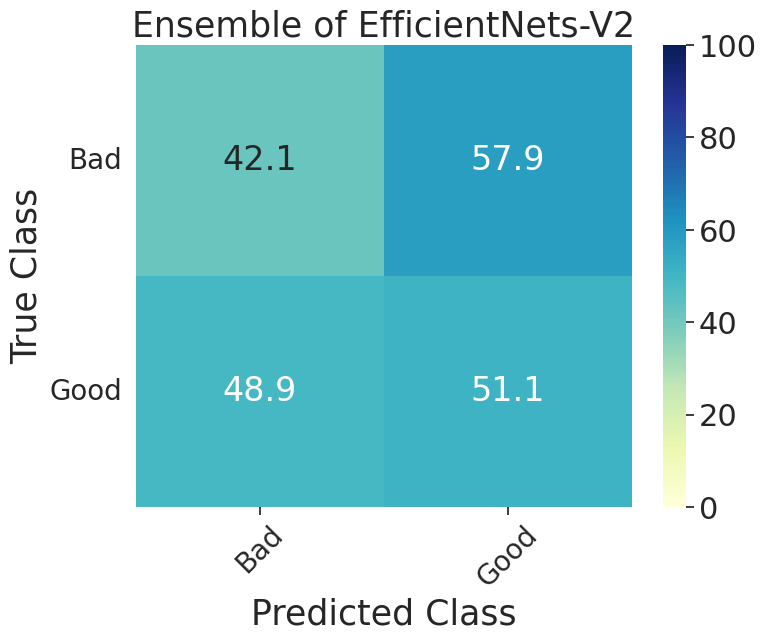

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_prob, normalize = 'true')
#confusion_mat[1, 0] = 6
#confusion_mat[1, 1] = 296
if multi_class:
  class_names = ['No-DR', 'NPDR-mild', 'NPDR-moderate', 'NPDR-severe', 'PDR']
else:
  class_names = ['Bad', 'Good']
print(confusion_mat)

# Plotting multilabel confusion matrix in a beautiful manner
sns.set(font_scale=2)
if multi_class:
  fig = plt.figure(figsize=(16, 14))
else:
  fig = plt.figure(figsize = (8,6))
ax= plt.subplot()
sns.heatmap(confusion_mat*100, annot=True, vmin = 0, vmax = 100, ax = ax, cmap = 'YlGnBu', fmt = '2.1f'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=25)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Class', fontsize=25)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

plt.title('Ensemble of EfficientNets-V2', fontsize=25)

plt.show()

## the following line of codes is extra, not required as of now

In [62]:
#y_pred = model.predict(X_validation)
y_prob = np.argmax(y_pred, axis = 1)

In [ ]:
y_pred = np.zeros(np.shape(y_pred_b0))

for i in range(len(y_validation)):
  y_pred[i, :] = (1/4)*(y_pred_b0[i, :] + y_pred_b1[i, :] + y_pred_b2[i, :] + y_pred_b3[i, :])

print(y_pred[0, :])

In [ ]:
y_pred = np.zeros(np.shape(y_pred_s))

for i in range(len(y_validation)):
  y_pred[i, :] = (1/3)*(y_pred_s[i, :] + y_pred_m[i, :] + y_pred_l[i, :])

print(y_pred[0, :])